___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser sigmoidal para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 0.7344 - accuracy: 0.5009
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7271 - accuracy: 0.5102
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.5196
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7127 - accuracy: 0.5326
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.5419
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.5605
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5717
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5773
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5847
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5866
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7374
Epoch 84/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7374
Epoch 85/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7393
Epoch 86/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7393
Epoch 87/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7430
Epoch 88/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7449
Epoch 89/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7393
Epoch 90/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7412
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7412
Epoch 92/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7412
Epoch 93/200
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7523
Epoch 167/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7523
Epoch 168/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7542
Epoch 169/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7561
Epoch 170/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7561
Epoch 171/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7561
Epoch 172/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7579
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7579
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7579
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7579
Epoch 176/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

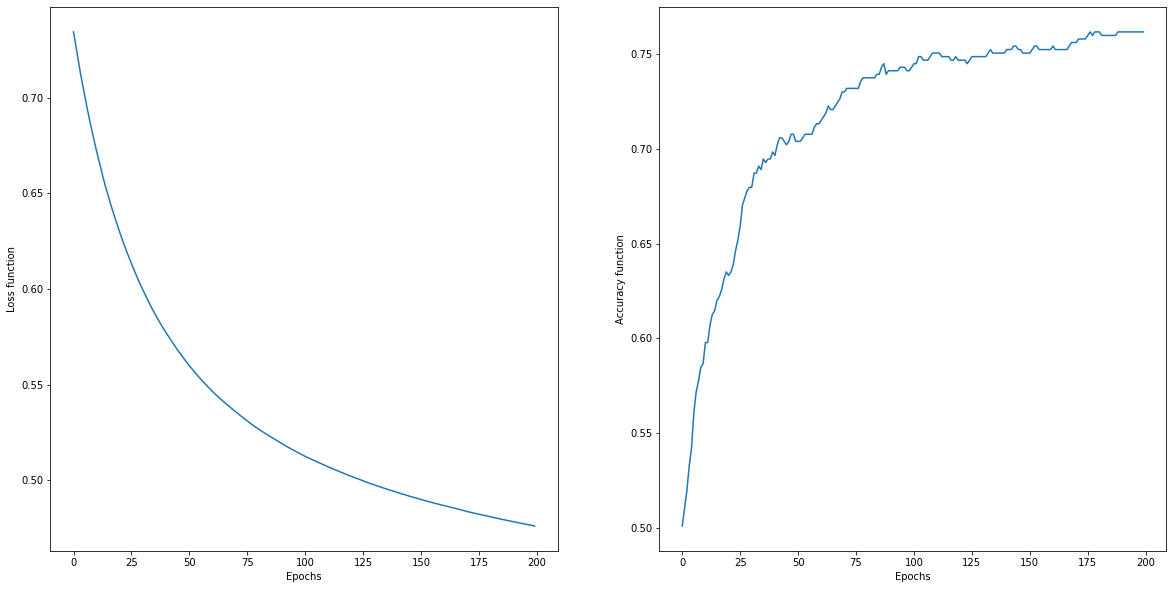

In [8]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(model_history.history['loss'])
plt.xlabel('Epochs'),plt.ylabel('Loss function')
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [12]:
#Usar el modelo para predecir
Y_pred = model_history.predict_classes(X_test)
Y_prob = model.predict_proba(X_test)

AttributeError: 'History' object has no attribute 'predict_classes'

In [ ]:
Y_pred

In [ ]:
Y_prob

In [10]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7316
[0.5133095383644104, 0.7316017150878906]


In [11]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,model.predict_classes(X_train))
prec_train = precision_score(Y_train,model.predict_classes(X_train))
reca_train = recall_score(Y_train,model.predict_classes(X_train))

accu_test = accuracy_score(Y_test,model.predict_classes(X_test))
prec_test = precision_score(Y_test,model.predict_classes(X_test))
reca_test = recall_score(Y_test,model.predict_classes(X_test))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [ ]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam

In [ ]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

In [ ]:
X

In [ ]:
Y

In [ ]:
dummy_y = np_utils.to_categorical(Y).astype(int)

In [ ]:
dummy_y

In [ ]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [ ]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


In [ ]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
#Predecir con el modelo
Y_pred = model.predict_classes(X)
Y_prob = model.predict_proba(X)

In [ ]:
#Evaluar el modelo
#score = model.evaluate(X, dummy_y,verbose=1)
#print(score)

score = model.evaluate(X_test,y_test)
print(score)

In [ ]:
#Más métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score)
from sklearn.metrics import (accuracy_score, precision_score, recall_score)
accu_train = accuracy_score(Y,model.predict_classes(X))
prec_train = precision_score(Y,model.predict_classes(X),average='weighted')
reca_train = recall_score(Y,model.predict_classes(X),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train))

In [ ]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [ ]:
accu_train = accuracy_score(y_train,model.predict_classes(X_train))
prec_train = precision_score(y_train,model.predict_classes(X_train),average='weighted')
reca_train = recall_score(y_train,model.predict_classes(X_train),average='weighted')

accu_test = accuracy_score(y_test,model.predict_classes(X_test))
prec_test = precision_score(y_test,model.predict_classes(X_test),average='weighted')
reca_test = recall_score(y_test,model.predict_classes(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

In [ ]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))